# Proyecto 4: Redes Sociales

## Integrantes:


- García Saavedra Armando
- Orozco Guillen Jorge David
- Rodriguez Nuñez Diego Eduardo

### Primero importamos las librerias necesarias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Instagram

#### 3.

In [2]:
i_d = pd.read_csv('socialnetworks\Insta_dec.csv')
i_d = (
    i_d
    .assign(
        Month = 'December'
    )
    .rename(columns={
        "Eng. (Auth.)": "Authentic",
        "Eng. (Avg.)": "Engagement",
        "name": "Username",
        "instagram name": "Name",
        "country": "Country",
        "Category_1":"Category1",
        "Category_2":"Category2",
        "followers": "Subscribers o Followers"
    })
    .drop(columns=['Rank'])
)
i_d

,Username,Name,Category1,Category2,Subscribers o Followers,Country,Authentic,Engagement,Month
0,leomessi,Leo Messi,Sports with a ball,Family,409.8M,Argentina,17.8M,23.4M,December
1,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,523M,India,11.7M,14.7M,December
2,neymarjr,NJ 🇧🇷,Sports with a ball,NaN,198.9M,Brazil,6.7M,9.5M,December
3,kyliejenner,Kylie 🤍,Fashion,Modeling,376.3M,United States,2.7M,4.3M,December
4,kendalljenner,Kendall,Modeling,Fashion,268M,United States,3.2M,5M,December
...,...,...,...,...,...,...,...,...,...
995,thiago6,Thiago Alcantara,Sports with a ball,NaN,10.4M,United Kingdom,129.9K,222.7K,December
996,soycintiacossio,Cintia Cossio,Modeling,Adult content,6M,Colombia,313.4K,390.6K,December
997,feat.dino,이찬,Lifestyle,NaN,2.7M,South Korea,716.6K,876.4K,December
998,djokernole,Novak Djokovic,Sports with a ball,NaN,11.8M,United States,158.6K,197.5K,December


In [3]:
i_j = pd.read_csv('socialnetworks\Insta_june.csv')
i_j = (
    i_j
    .assign(
        Month = 'June'
    )
    .rename(columns={
        "instagram name": "Username",
        "influencer name ": "Name",
        "Category_1":"Category1",
        "Category_2":"Category2",
        "Subscribers count":"Subscribers o Followers",
        "Views avg.": "Country",
        "Likes avg": "Authentic",
        "Comments avg.": "Engagement"
    })
)
i_j

,Username,Name,Category1,Category2,Subscribers o Followers,Country,Authentic,Engagement,Month
0,433,433,Sports with a ball,NaN,50.7M,Spain,274.9K,456.7K,June
1,____kimwoobin,김우빈,Lifestyle,NaN,3.6M,Indonesia,449.4K,592.7K,June
2,__youngbae__,TAEYANG,Music,NaN,13.4M,Indonesia,269.6K,304.1K,June
3,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.6M,Russia,164.4K,189.4K,June
4,_hakkencoser_,Hakken 八犬,Lifestyle,Photography,3.5M,United States,525.1K,643K,June
...,...,...,...,...,...,...,...,...,...
1017,zidane,zidane,Sports with a ball,NaN,33M,Spain,412.4K,560.8K,June
1018,zidane,zidane,Sports with a ball,NaN,33M,Spain,412.4K,560.8K,June
1019,zkdlin,KAI,Music,NaN,14.1M,Indonesia,1.4M,1.7M,June
1020,zo,Lonzo Ball,Sports with a ball,NaN,14M,United States,145.8K,262K,June


In [4]:
i_n = pd.read_csv('socialnetworks\Insta_nov.csv')
i_n = (
    i_n
    .assign(
        Month = 'November'
    )
    .rename(columns={
        "Name":"Username",
        "Instagram Name": "Name",
        "Category-1":"Category1",
        "Category-2":"Category2",
        "Followers":"Subscribers o Followers",
        "\nCountry": "Country",
        "Eng. (Auth.)": "Authentic",
        "Eng. (Avg.)": "Engagement"
    })
    .drop(columns=['s.no'])
)
i_n

,Username,Name,Category1,Subscribers o Followers,Country,Authentic,Engagement,Category2,Month
0,cristiano,Cristiano Ronaldo,Sports with a ball,483.1M,India,4.5M,5.6M,NaN,November
1,kyliejenner,Kylie 🤍,Fashion,370M,United States,2.8M,4.4M,Modeling,November
2,leomessi,Leo Messi,Sports with a ball,357.8M,Indonesia,3.2M,4.1M,Family,November
3,arianagrande,Ariana Grande,Music,331.6M,United States,2.9M,4M,NaN,November
4,zendaya,Zendaya,Cinema & Actors/actresses,152.2M,United States,4.8M,6.5M,Fashion,November
...,...,...,...,...,...,...,...,...,...
995,thenewclassic,Iggy Azalea,Music,16.7M,United States,82.1K,132.8K,NaN,November
996,min.nicha,MINNIE,Lifestyle,4.2M,Thailand,385.5K,526.6K,Music,November
997,francety,Francia James,Adult content,11.4M,India,149.9K,196.6K,NaN,November
998,silambarasantrofficial,Silambarasan TR,Shows,10.2M,India,169.6K,216.6K,Lifestyle,November


In [5]:
i_s = pd.read_csv('socialnetworks\Insta_sep.csv')
i_s = (
    i_s
    .assign(
        Month = 'September'
    )
    .rename(columns={
        "Instagram name": "Username",
        " Name": "Name",
        "Category_1":"Category1",
        "Category_2":"Category2",
        "Subscribers":"Subscribers o Followers",
        "Audience country": "Country",
        "Authentic engagement\n": "Authentic",
        "Engagement average\r\n": "Engagement"
    })
    .drop(columns=['S.no'])
)
i_s

,Username,Name,Subscribers o Followers,Country,Authentic,Engagement,Category1,Category2,Month
0,cristiano,Cristiano Ronaldo,477.9M,India,5M,6.2M,Sports with a ball,NaN,September
1,kyliejenner,Kylie 🤍,368.1M,United States,3.5M,5.5M,Fashion,Modeling,September
2,arianagrande,Ariana Grande,329.6M,United States,2.9M,4M,NaN,NaN,September
3,leomessi,Leo Messi,358.6M,Indonesia,2.7M,3.5M,Sports with a ball,Family,September
4,zendaya,Zendaya,151.1M,United States,4.3M,5.8M,Cinema & Actors/actresses,Fashion,September
...,...,...,...,...,...,...,...,...,...
1045,jadethirlwall,jade amelia thirlwall,9.4M,United States,174.2K,228.1K,NaN,NaN,September
1046,ninja,User Not Found,12.9M,United States,127.8K,163.9K,Computers & Gadgets,Machinery & Technologies,September
1047,myriamfares,Myriam Fares,20.6M,Iraq,75.8K,102.4K,NaN,NaN,September
1048,optimushwang,황민현,4.2M,South Korea,426K,508K,Lifestyle,NaN,September


Concatenamos los 4 archivos leídos dentro de un solo DataFrame

In [6]:
df_insta = pd.concat([i_d,i_j,i_n,i_s],ignore_index=True)
df_insta

,Username,Name,Category1,Category2,Subscribers o Followers,Country,Authentic,Engagement,Month
0,leomessi,Leo Messi,Sports with a ball,Family,409.8M,Argentina,17.8M,23.4M,December
1,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,523M,India,11.7M,14.7M,December
2,neymarjr,NJ 🇧🇷,Sports with a ball,NaN,198.9M,Brazil,6.7M,9.5M,December
3,kyliejenner,Kylie 🤍,Fashion,Modeling,376.3M,United States,2.7M,4.3M,December
4,kendalljenner,Kendall,Modeling,Fashion,268M,United States,3.2M,5M,December
...,...,...,...,...,...,...,...,...,...
4067,jadethirlwall,jade amelia thirlwall,NaN,NaN,9.4M,United States,174.2K,228.1K,September
4068,ninja,User Not Found,Computers & Gadgets,Machinery & Technologies,12.9M,United States,127.8K,163.9K,September
4069,myriamfares,Myriam Fares,NaN,NaN,20.6M,Iraq,75.8K,102.4K,September
4070,optimushwang,황민현,Lifestyle,NaN,4.2M,South Korea,426K,508K,September


#### 4.

In [7]:
insta_res = pd.read_csv('socialnetworks/Insta.csv')
insta_res = (
    insta_res
    .rename(columns={
        "Influencer insta name": "Username",
        "instagram name": "Name",
        "category_1":"Category1",
        "category_2":"Category2",
        "Followers":"Subscribers o Followers",
        "Audience country(mostly)":"Country",
        "Authentic engagement\r\n":"Authentic",
        "Engagement avg\r\n":"Engagement"
    })
)
insta_res

,Username,Name,Category1,Category2,Subscribers o Followers,Country,Authentic,Engagement
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M
...,...,...,...,...,...,...,...,...
995,zendaya,Zendaya,Cinema & Actors/actresses,Fashion,136.1M,United States,6.4M,8.6M
996,zidane,zidane,Sports with a ball,NaN,31.2M,Spain,546K,744.1K
997,zkdlin,KAI,Music,NaN,13.9M,Indonesia,1.3M,1.6M
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,NaN,8.2M,United States,583K,885.5K


#### 5.

##### i)
Eliminamos los duplicados de la columna "Username" del DataFrame anterior y creamos una copia llamada "tam" que contiene todas las cuentas sin repeticiones

In [8]:
duplicadosnt = df_insta.drop_duplicates(subset=['Username'], keep='first')
tam = duplicadosnt.copy()
tam.shape

(1384, 9)

Podemos observar que tam contiene 1384 filas, lo que significa que hay 1384 cuentas únicas y 2688 repeticiones.

In [9]:
tam

,Username,Name,Category1,Category2,Subscribers o Followers,Country,Authentic,Engagement,Month
0,leomessi,Leo Messi,Sports with a ball,Family,409.8M,Argentina,17.8M,23.4M,December
1,cristiano,Cristiano Ronaldo,Sports with a ball,NaN,523M,India,11.7M,14.7M,December
2,neymarjr,NJ 🇧🇷,Sports with a ball,NaN,198.9M,Brazil,6.7M,9.5M,December
3,kyliejenner,Kylie 🤍,Fashion,Modeling,376.3M,United States,2.7M,4.3M,December
4,kendalljenner,Kendall,Modeling,Fashion,268M,United States,3.2M,5M,December
...,...,...,...,...,...,...,...,...,...
4005,bighit_exhibition,2022 BTS EXHIBITION : Proof,NaN,NaN,5.6M,Indonesia,310.3K,384.6K,September
4006,mario_houses,Mario Casas,Modeling,Cinema & Actors/actresses,7M,Spain,210.1K,311K,September
4012,naisaalifiayuriza,Naisa Alifia Yuriza,Lifestyle,NaN,9.9M,Indonesia,194.9K,218.3K,September
4015,leosantana,O GIGANTE,NaN,NaN,17.9M,Brazil,63.7K,119.5K,September


##### ii) 
Calculamos los promedios de Subscribers, Authentic y Engagement de cada cuenta considerando las repeticiones encontradas y guardamos los resultados en un nuevo DataFrame llamado "Promedios". Antes de hacer esto, comprobé que no hubiera valores nulos,vacíos, N/A o 0. Otra vez se observa que es un df de 1384 filas por lo que hasta ahorita todo parece estar correcto.

In [10]:
columnas = ['Subscribers o Followers', 'Authentic', 'Engagement']
for columna in columnas:
    df_insta[columna] = (df_insta[columna]
                        .str.replace('M', '')
                        .str.replace('K', '')
                        .astype(float)
                        .mul(df_insta[columna]
                        .str.extract('([MK])')[0]
                        .map({'M': 1e6, 'K': 1e3}))
                        )
promedios_list = []
for username in df_insta["Username"].unique():
    creoquefilas = df_insta[df_insta["Username"] == username]
    subscribers = np.sum(creoquefilas["Subscribers o Followers"])
    authentic = np.sum(creoquefilas["Authentic"])
    engagement = np.sum(creoquefilas["Engagement"])
    reps = len(creoquefilas)
    promedio_subscribers = np.divide(subscribers, reps)
    promedio_authentic = np.divide(authentic, reps)
    promedio_engagement = np.divide(engagement, reps)
    pais = creoquefilas["Country"].values[0]
    promedios_list.append({'Username': username,
                           'Promedio Subscribers': promedio_subscribers,
                           'Promedio Authentic': promedio_authentic,
                           'Promedio Engagement': promedio_engagement,
                           'País': pais})
promedios = pd.DataFrame(promedios_list)
promedios

,Username,Promedio Subscribers,Promedio Authentic,Promedio Engagement,País
0,leomessi,366975000.0,7100000.0,9325000.0,Argentina
1,cristiano,485800000.0,6575000.0,8175000.0,India
2,neymarjr,182875000.0,2775000.0,3950000.0,Brazil
3,kyliejenner,366775000.0,2950000.0,4700000.0,United States
4,kendalljenner,256575000.0,1869600.0,2950000.0,United States
...,...,...,...,...,...
1379,bighit_exhibition,5600000.0,310300.0,384600.0,Indonesia
1380,mario_houses,7000000.0,210100.0,311000.0,Spain
1381,naisaalifiayuriza,9900000.0,194900.0,218300.0,Indonesia
1382,leosantana,17900000.0,63700.0,119500.0,Brazil


##### iii)
Posteriormente calculamos la métrica de valor de cada cuenta dividiendo el promedio de engagement sobre el promedio de seguidores de cada cuenta.

In [11]:
promedios["Métrica de Valor"] = promedios['Promedio Engagement'] / promedios['Promedio Subscribers']
promedios

,Username,Promedio Subscribers,Promedio Authentic,Promedio Engagement,País,Métrica de Valor
0,leomessi,366975000.0,7100000.0,9325000.0,Argentina,0.025410
1,cristiano,485800000.0,6575000.0,8175000.0,India,0.016828
2,neymarjr,182875000.0,2775000.0,3950000.0,Brazil,0.021599
3,kyliejenner,366775000.0,2950000.0,4700000.0,United States,0.012814
4,kendalljenner,256575000.0,1869600.0,2950000.0,United States,0.011498
...,...,...,...,...,...,...
1379,bighit_exhibition,5600000.0,310300.0,384600.0,Indonesia,0.068679
1380,mario_houses,7000000.0,210100.0,311000.0,Spain,0.044429
1381,naisaalifiayuriza,9900000.0,194900.0,218300.0,Indonesia,0.022051
1382,leosantana,17900000.0,63700.0,119500.0,Brazil,0.006676


Esta solamente es una funcion que calcula el numero de Usernames repetidos dentro de df_insta, el número de repeticiones de cada Username. 

In [12]:
def ocurrencias(df):
    duplicados = df['Username'].duplicated()
    total_repeticiones = duplicados.sum()
    if total_repeticiones == 0:
        print("No se encontraron usernames duplicados en el DataFrame.")
    else:
        print(f"Total de repeticiones en el DataFrame: {total_repeticiones}")
        ocurrencias = df[duplicados]['Username'].value_counts()
        for username, ocurrencia in ocurrencias.items():
            indices = df[df['Username'] == username].index.tolist()
            print(f"Username: {username}, Repeticiones: {ocurrencia + 1}, Índices: {indices}")

Se observa que efectivamente hay 2688 repeticiones dentro de df_insta.

In [13]:
ocurrencias(df_insta)

Total de repeticiones en el DataFrame: 2688
Username: brfootball, Repeticiones: 6, Índices: [607, 1139, 2732, 3708, 3996, 4046]
Username: francety, Repeticiones: 6, Índices: [949, 953, 1303, 3019, 4013, 4063]
Username: manurios, Repeticiones: 5, Índices: [345, 1606, 1607, 2301, 3326]
Username: liluzivert, Repeticiones: 5, Índices: [198, 1561, 1562, 2243, 3289]
Username: phoebejtonkin, Repeticiones: 5, Índices: [941, 1740, 2694, 3585, 3678]
Username: malutrevejo, Repeticiones: 5, Índices: [619, 1601, 1602, 2674, 3631]
Username: i_nivethathomas, Repeticiones: 5, Índices: [740, 1374, 1375, 2904, 3823]
Username: thiagosilva, Repeticiones: 5, Índices: [428, 1918, 1919, 2830, 3911]
Username: arishfakhan138, Repeticiones: 5, Índices: [589, 1091, 1092, 2868, 3727]
Username: toni.kr8s, Repeticiones: 5, Índices: [466, 1931, 2485, 3370, 3376]
Username: valeyellow46, Repeticiones: 5, Índices: [717, 1945, 2858, 4007, 4057]
Username: sureshraina3, Repeticiones: 5, Índices: [646, 1884, 2344, 3371, 33

Aquí nomás agarré un usuario al azar pa ver que sí jalara bien la función e imprimiera correctamente tanto los índices como el número de repeticiones y sí tabien.

In [14]:
indice = df_insta[df_insta['Username']=='silambarasantrofficial']
indice

,Username,Name,Category1,Category2,Subscribers o Followers,Country,Authentic,Engagement,Month
3020,silambarasantrofficial,Silambarasan TR,Shows,Lifestyle,10200000.0,India,169600.0,216600.0,November
3984,silambarasantrofficial,Silambarasan TR,Shows,Lifestyle,10200000.0,India,169600.0,216600.0,September
4034,silambarasantrofficial,Silambarasan TR,Shows,Lifestyle,10200000.0,India,169600.0,216600.0,September


##### iv)
Procedemos a graficar el numero de cuentas que empiezan con un alguna letra del abecedario y el numero de cuentas que no empiezan con una letra del abecedario. 

In [15]:
def graficar_histograma(df):
    df_cleaned = df.dropna(subset=['Username'])
    usernames_letra = df_cleaned[df_cleaned['Username'].str[0].str.isalpha()]['Username']
    usernames_sin_letra = df_cleaned[~df_cleaned['Username'].str[0].str.isalpha()]['Username']
    categorias = ['Letra','Sin letra']
    counts = [len(usernames_letra), len(usernames_sin_letra)]
    sns.set(style='ticks', palette='pastel')
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=categorias, y=counts)
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad de usernames')
    plt.title('Cantidad de usernames')
    for i, count in enumerate(counts):
        ax.text(i, count, str(count), ha='center', va='bottom')
    plt.show()

Observamos que de los 4072 registros del DataFrame (sin eliminar duplicados, obviamente) 4000 cuentas comienzan con una letra del abecedario mientras que 72 no.

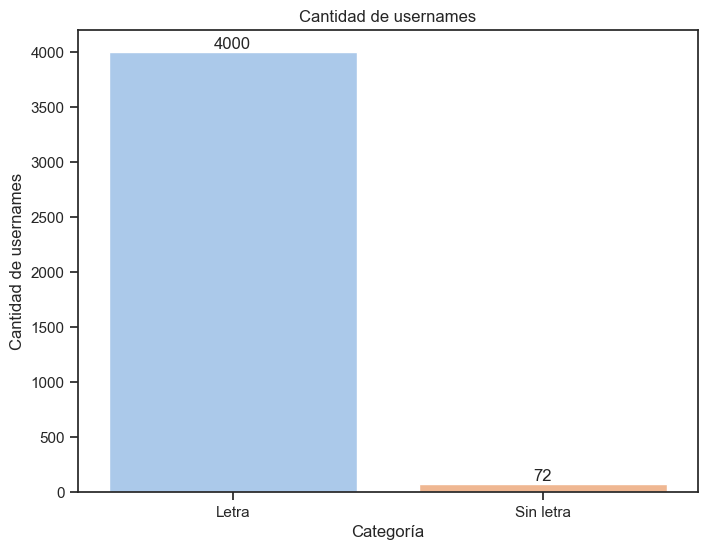

In [16]:
graficar_histograma(df_insta)

Aquí imprimimos en una lista todas las cuentas que no inician con una letra del alfabeto y se comprueba que efectivamente son 72.

In [17]:
usernames_sin_letra = df_insta[~df_insta['Username'].str[0].str.isalpha()]['Username']
print("Usernames que no comienzan con una letra del alfabeto:")
print(usernames_sin_letra.tolist())
num_elementos_usernames_sin_letra = len(usernames_sin_letra)
print("Número de elementos en usernames_sin_letra:", num_elementos_usernames_sin_letra)

Usernames que no comienzan con una letra del alfabeto:
['6ix9ine', '433', '_jeongjaehyun', '_rl9', '9gag', '_zyozyo', '_imyour_joy', '_mariahwasa', '21savage', '7_luhan_m', '_seorina', '_shotaroo_', '_chaechae_1', '_yujin_an', '333cyj333', '_hakkencoser_', '_agentgirl_', '433', '____kimwoobin', '__youngbae__', '_agentgirl_', '_hakkencoser_', '_hakkencoser_', '_imyour_joy', '_jeongjaehyun', '_mariahwasa', '_rl9', '_seorina', '_shotaroo_', '_zyozyo', '03_hu', '21savage', '39saku_chan', '3gerardpique', '5sos', '9gag', '433', '_rl9', '_jeongjaehyun', '_imyour_joy', '_zyozyo', '_mariahwasa', '9gag', '_seorina', '__youngbae__', '7_luhan_m', '39saku_chan', '_shotaroo_', '5.min.crafts', '_schwim_', '21savage', '_abu_saalim_', '_chaechae_1', '333cyj333', '____kimwoobin', '03_hu', '_hakkencoser_', '_rl9', '433', '_jeongjaehyun', '_zyozyo', '_imyour_joy', '9gag', '_mariahwasa', '_seorina', '__youngbae__', '39saku_chan', '21savage', '_abu_saalim_', '_irishbella_', '_chaechae_1', '_hakkencoser_']
N

##### v)
Aquí calculamos cuál es el username que contiene más caracteres dentro del DataFrame

In [18]:
mas_chars = df_insta.loc[df_insta['Username'].str.len().idxmax(), 'Username']
print("Username más largo:", mas_chars)
print("Longitud:", len(mas_chars))

Username más largo: jungkook_bighitentertainment
Longitud: 28


##### vi)
Después calculamos el numero de cuentas las cuales ya sea su **USERNAME O NAME** inicien con la primer letra del primer nombre de los integrantes del equipo (A, D, J) dentro del DataFrame concatenado, eliminamos los usernames y names duplicados y convertimos todo a minúsculas para que no haya falla. Observamos que hay 344 cuentas que cumplen con la condición.

In [19]:
iniciales = df_insta[(df_insta['Username'].str.lower().str.startswith(('a', 'd', 'j'))) | (df_insta['Name'].str.lower().str.startswith(('a', 'd','j'))) ].drop_duplicates(subset=['Username', 'Name']).dropna(subset=['Username','Name'])
iniciales

,Username,Name,Category1,Category2,Subscribers o Followers,Country,Authentic,Engagement,Month
5,arianagrande,Ariana Grande,Music,NaN,345900000.0,United States,2500000.0,3400000.0,December
15,agustd,SUGA of BTS 민윤기,Lifestyle,Music,41400000.0,NaN,9500000.0,9500000.0,December
16,justinbieber,Justin Bieber,Music,NaN,270000000.0,Brazil,1000000.0,1400000.0,December
17,jennierubyjane,J,Music,NaN,72300000.0,Indonesia,4400000.0,5200000.0,December
18,therock,Dwayne Johnson,Fitness & Gym,Art/Artists,355200000.0,India,761200.0,976300.0,December
...,...,...,...,...,...,...,...,...,...
3876,dukeandduchessofcambridge,Duke and Duchess of Cambridge,Family,Finance & Economics,13900000.0,United States,147100.0,187900.0,September
3893,dorra_zarrouk,DORRA درة.,Cinema & Actors/actresses,Fashion,15900000.0,Egypt,118200.0,158800.0,September
3955,gun_atthaphan,ATp,Lifestyle,NaN,5600000.0,Indonesia,349300.0,418100.0,September
3967,juliabarretto,Julia,Cinema & Actors/actresses,Lifestyle,11200000.0,Philippines,159300.0,203700.0,September


##### vii)
Metrica para top 10 cuentas, tomamos el engagement pq en si es likes+comments+shares/followers, y el Authentic

In [20]:
df_instam = (
    df_insta
    .assign(
        Metrica = df_insta['Engagement']/df_insta['Authentic']
    )
    .sort_values(by=['Metrica'], ascending=False)
)
df_instam.head(10)

,Username,Name,Category1,Category2,Subscribers o Followers,Country,Authentic,Engagement,Month,Metrica
1381,iampauloandre,Paulo André 🏁,Lifestyle,NaN,10000000.0,Brazil,68000.0,239700.0,June,3.525000
1398,isaias,Isaías,Shows,NaN,9200000.0,Brazil,72800.0,239400.0,June,3.288462
1948,vanessalopesr_,Vanessa Lopes,Lifestyle,NaN,11700000.0,Brazil,76100.0,248500.0,June,3.265440
792,vanessalopesr_,Vanessa Lopes,Lifestyle,Music,13300000.0,Brazil,72300.0,235800.0,December,3.261411
3801,vanessalopesr_,Vanessa Lopes,Lifestyle,NaN,12300000.0,Brazil,73700.0,240200.0,September,3.259159
2707,vanessalopesr_,Vanessa Lopes,Lifestyle,Music,12400000.0,Brazil,89800.0,292600.0,November,3.258352
4010,choquei,CHOQUEI,Literature & Journalism,NaN,17500000.0,Brazil,39800.0,124100.0,September,3.118090
4060,choquei,CHOQUEI,Literature & Journalism,NaN,17500000.0,Brazil,39800.0,124100.0,September,3.118090
3542,choquei,CHOQUEI,Literature & Journalism,NaN,17500000.0,Brazil,97100.0,301600.0,September,3.106076
2631,choquei,CHOQUEI,Literature & Journalism,NaN,17600000.0,Brazil,79100.0,245600.0,November,3.104930


##### viii) y x) 
Procedemos a crear una serie con todos los países.

In [21]:
serie_paises2 = promedios.groupby('País')['Promedio Subscribers'].mean()
serie_paises2 = serie_paises2[serie_paises2.index.str.match(r'^[a-zA-Z\s]+$')]
serie_paises2

País
Albania                 1.050000e+07
Algeria                 9.275000e+06
Argentina               2.467528e+07
Australia               9.650000e+06
Brazil                  2.284064e+07
Chile                   1.455000e+07
China                   1.344444e+07
Colombia                1.274808e+07
Egypt                   1.841042e+07
Ethiopia                3.880000e+07
France                  2.835556e+07
Germany                 1.730190e+07
India                   2.960075e+07
Indonesia               1.630174e+07
Iran                    1.034549e+07
Iraq                    1.467130e+07
Italy                   1.534062e+07
Japan                   6.000000e+06
Kazakhstan              7.000000e+06
Mexico                  1.555097e+07
Morocco                 8.081250e+06
Nigeria                 1.517083e+07
Pakistan                7.650000e+06
Philippines             1.151167e+07
Poland                  2.940000e+07
Portugal                1.270000e+07
Romania                 4.700000e

Y graficamos los resultados.

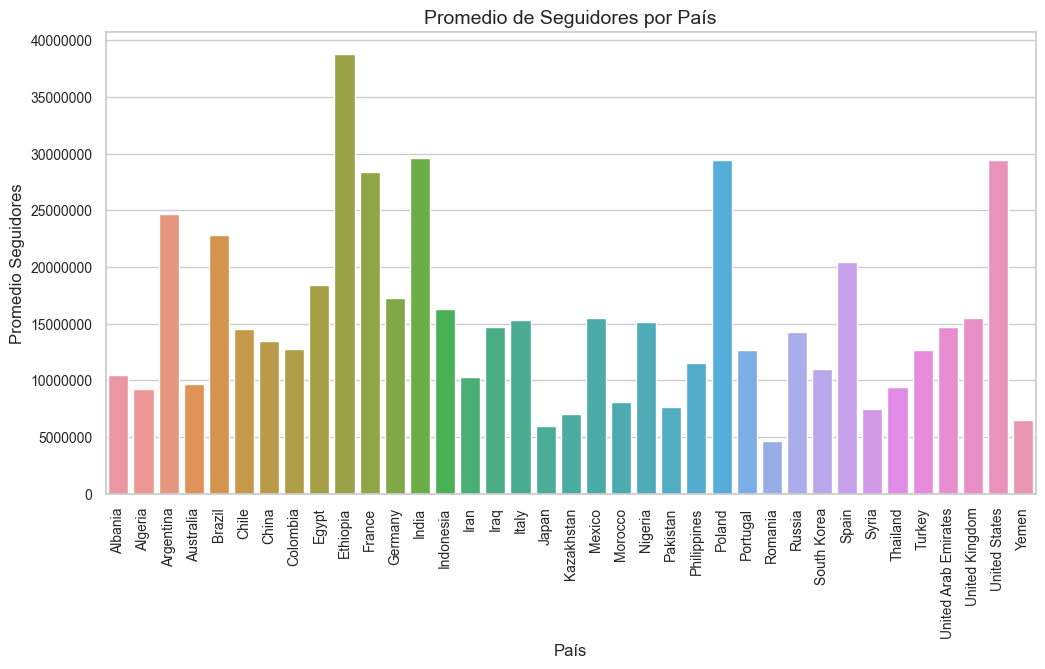

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=serie_paises2.index, y=serie_paises2.values)
plt.xlabel('País', fontsize=12)
plt.ylabel('Promedio Seguidores', fontsize=12)
plt.title('Promedio de Seguidores por País', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

##### ix)
Cree una serie con todas las categorias existentes en todos los archivos de Instagram.

In [23]:
serie_category = pd.concat([df_insta['Category1'], df_insta['Category2']], ignore_index=True).dropna().unique()
serie_category

array(['Sports with a ball', 'Fashion', 'Modeling', 'Music',
       'Photography', 'Lifestyle', 'Fitness & Gym', 'Art/Artists',
       'Cinema & Actors/actresses', 'Finance & Economics', 'Science',
       'Shows', 'Beauty', 'Humor & Fun & Happiness', 'Family',
       'Racing Sports', 'Clothing & Outfits', 'Computers & Gadgets',
       'Food & Cooking', 'Nature & landscapes', 'Literature & Journalism',
       'Business & Careers', 'Cars & Motorbikes', 'Luxury', 'Gaming',
       'Machinery & Technologies', 'Adult content', 'Animals',
       'Education', 'Water sports', 'Winter sports', 'Travel',
       'Accessories & Jewellery', 'Extreme Sports & Outdoor activity',
       'Management & Marketing', 'Crypto', 'DIY & Design', 'Kids & Toys',
       'Shopping & Retail', 'Comics & sketches', 'Trainers & Coaches',
       'Politics', 'NFT'], dtype=object)

##### xi)
Grafique en un histograma el numero de seguidores por categoria.

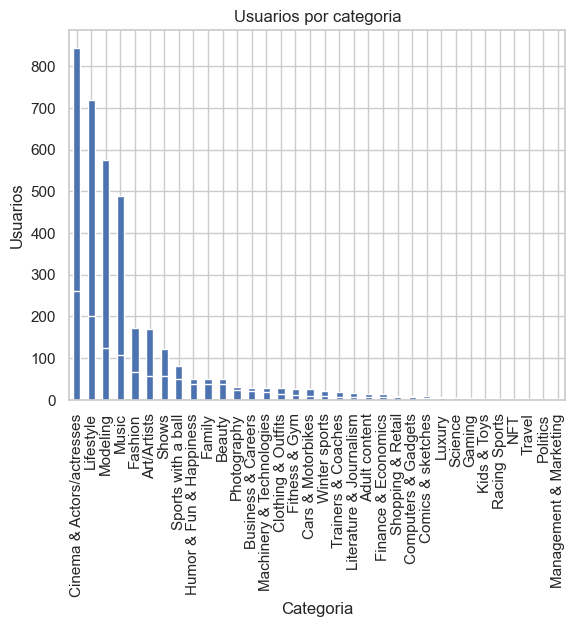

In [24]:
category1  = df_insta['Category1'].value_counts()
category2 = df_insta['Category2'].value_counts()
category1.plot(kind='bar')
category2.plot(kind='bar')
plt.xlabel('Categoria')
plt.ylabel('Usuarios')
plt.title('Usuarios por categoria')
plt.show()

***
### Tiktok

#### 3.

In [25]:
t_d = pd.read_csv('socialnetworks/Tiktok_dec.csv')
t_d = (
    t_d
    .assign(
        Month = 'December'
    )
    .rename(columns={
        "views(avg)": "Views",
        "likes(avg.)": "Likes",
        "Tiktoker name": "Username",
        "Tiktok name": "Name",
        "comments(avg.)": "Comments",
        "followers": "Subscribers o Followers",
        "shares(avg.)":"Shares"
    })
    .drop(columns=['Rank'])
)
t_d

,Username,Name,Subscribers o Followers,Views,Likes,Comments,Shares,Month
0,mrbeast,MrBeast,60.3M,29.2M,3.5M,30.8K,7.2K,December
1,karolg,Karol G,42.4M,23.7M,3.4M,21.7K,25.7K,December
2,yzn47,يزن الأسمر,8.9M,48.9M,998.4K,16.3K,60.9K,December
3,centralcee,CentralCee,4.4M,19.8M,3.6M,23.3K,24.2K,December
4,adinross,adin,6.1M,21.1M,3.3M,17.5K,25.3K,December
...,...,...,...,...,...,...,...,...
995,jiembasands,Jiemba Sands,4.9M,3.4M,247.4K,207,264,December
996,crissa_ace,Crissa Jackson,14.9M,1.6M,141.7K,1.2K,580,December
997,ichadude,Alyssa & Dude,468.8K,2.3M,85.5K,997,1K,December
998,kanebrown,Kane Brown,5.2M,1.7M,96.7K,1.3K,1.2K,December


In [26]:
t_j = pd.read_csv('socialnetworks\Tiktok_june.csv')
t_j = (
    t_j
    .assign(
        Month = 'June'
    )
    .rename(columns={
        "Views avg.": "Views",
        "Likes avg": "Likes",
        "Tiktoker": "Username",
        "influencer name": "Name",
        "Comments avg.": "Comments",
        "Subscribers count": "Subscribers o Followers",
        "Shares avg":"Shares"
    })
)
t_j

,Username,Name,Subscribers o Followers,Views,Likes,Comments,Shares,Month
0,___nicoichi___,NICO【平成フラミンゴ】,1.3M,1.9M,225.3K,1.7K,1.1K,June
1,_.anime.edits_0,video,97K,1.7M,75.6K,1.5K,8.7K,June
2,_.respect.boss._,Respect compilation 🤝🥶,1.5M,4.4M,241.9K,249,797,June
3,_.the.meme.hub._,RANDOM MEMES,2.3M,3.8M,787.7K,2.9K,9K,June
4,_andrewcurtiss,Andrew Curtis,2.5M,1.4M,300.4K,5.8K,4K,June
...,...,...,...,...,...,...,...,...
1002,zeth,Zeth,12.5M,6.7M,1.3M,3K,7.7K,June
1003,zodiac.boyfriend,Zodiac Boyfriend🪐🔮,1.8M,1.9M,272.7K,6.8K,3.6K,June
1004,zowloficial,Lord Zowl,1.1M,1.4M,178.1K,1.4K,2.1K,June
1005,zrt.foot,ZR7,100.8K,2.3M,218K,1.7K,6.4K,June


In [27]:
t_n = pd.read_csv('socialnetworks/Tiktok_nov.csv')
t_n = (
    t_n
    .assign(
        Month = 'November'
    )
    .rename(columns={
        "Views (Avg.)": "Views",
        "Likes (Avg.)": "Likes",
        "Tiktok name": "Username",
        "Tiktoker name": "Name",
        "Comments (Avg.)": "Comments",
        "\nFollowers": "Subscribers o Followers",
        "Shares (Avg.)":"Shares"
    })
    .drop(columns=['row-cell'])
    .dropna()
)
t_n

,Name,Username,Subscribers o Followers,Views,Likes,Comments,Shares,Month
1,yossikramer,Yossi,145.6K,26.8M,2.2M,30.1K,71.2K,November
2,mrbeast,MrBeast,55.6M,38.1M,3.8M,19K,7.8K,November
3,adinross,adin,5.4M,16.6M,2M,10.9K,12.5K,November
4,daniel.labelle,Daniel LaBelle,27.9M,11.8M,1.7M,6.9K,29.3K,November
5,hotspanishmx,HotSpanish,8.2M,19.2M,1.7M,7.4K,9.5K,November
...,...,...,...,...,...,...,...,...
996,nathanmccarron0,Nathan’s Art,1.6M,1.1M,117.6K,1.4K,1.1K,November
997,lacha21.1,Lazaro Gonzalez,669.4K,750.3K,118.3K,655,3K,November
998,hyoga.x,Hyoga,552K,1M,121.9K,1.9K,727,November
999,rrqr7tatsumaki,Rivaldi Fataah,1.1M,2M,112.5K,1K,414,November


In [28]:
t_s = pd.read_csv('socialnetworks/Tiktok_sep.csv')
t_s = (
    t_s
    .assign(
        Month = 'September'
    )
    .rename(columns={
        "Views avg.": "Views",
        "Likes avg.": "Likes",
        "Tiktok name": "Name",
        "Tiktoker name": "Username",
        "Comments avg.": "Comments",
        "Subscribers": "Subscribers o Followers",
        "Shares avg.":"Shares"
    })
    .drop(columns=['S.no'])
    .dropna()
)
t_s

,Username,Name,Subscribers o Followers,Views,Likes,Comments,Shares,Month
0,jypestraykids,Stray Kids,13.8M,6.4M,2.3M,50.2K,34.2K,September
1,khaby.lame,Khabane lame,149.2M,17.3M,2.3M,15.2K,8.7K,September
2,scarlettsspam2,scarlett,2.1M,17.9M,845.8K,53.9K,6.3K,September
3,addisonre,Addison Rae,88.7M,22M,906.6K,7.6K,26.2K,September
4,belindatok,Belinda,4.8M,14.2M,1.5M,14.5K,15.3K,September
...,...,...,...,...,...,...,...,...
995,brendadialoy,Brenda Dialoy,371.9K,1.2M,187.5K,626,2K,September
996,jujufitcats,Juju Fitcats,4.3M,2.2M,280.8K,380,558,September
997,xoteam,XO Team,37.8M,2.5M,180.2K,859,450,September
998,kimsnwuo,️️,100.9K,957.4K,226.8K,908,1.7K,September


In [29]:
df_tiktok = pd.concat([t_d,t_j,t_n,t_s],ignore_index=True)
df_tiktok

,Username,Name,Subscribers o Followers,Views,Likes,Comments,Shares,Month
0,mrbeast,MrBeast,60.3M,29.2M,3.5M,30.8K,7.2K,December
1,karolg,Karol G,42.4M,23.7M,3.4M,21.7K,25.7K,December
2,yzn47,يزن الأسمر,8.9M,48.9M,998.4K,16.3K,60.9K,December
3,centralcee,CentralCee,4.4M,19.8M,3.6M,23.3K,24.2K,December
4,adinross,adin,6.1M,21.1M,3.3M,17.5K,25.3K,December
...,...,...,...,...,...,...,...,...
4001,brendadialoy,Brenda Dialoy,371.9K,1.2M,187.5K,626,2K,September
4002,jujufitcats,Juju Fitcats,4.3M,2.2M,280.8K,380,558,September
4003,xoteam,XO Team,37.8M,2.5M,180.2K,859,450,September
4004,kimsnwuo,️️,100.9K,957.4K,226.8K,908,1.7K,September


#### 4.

In [30]:
tiktok_res = pd.read_csv('socialnetworks\Tiktok.csv')
tiktok_res = (
    tiktok_res
    .rename(columns={
        "Tiktoker name":"Username",
        "Tiktok name":"Name",
        "Subscribers count": "Subscribers o Followers",
        "Views avg.":"Views",
        "Likes avg":"Likes",
        "Comments avg.":"Comments",
        "Shares avg":"Shares"
    })
)
tiktok_res

,Username,Name,Subscribers o Followers,Views,Likes,Comments,Shares
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K
1,dojacat,Doja Cat,22.2M,25.4M,5M,36.7K,46.8K
2,kiet.ac.quy,Kiệt Ắk Wỷ,2.1M,20.7M,3.5M,38.8K,33.9K
3,charlidamelio,charli d’amelio,135.4M,18.7M,2.6M,54.7K,35.2K
4,luvadepedreiro,Iran Ferreira (Lai),11.4M,24.8M,2.6M,32.7K,26.8K
...,...,...,...,...,...,...,...
995,nicolebernaal,nicolebernaal,4M,2.2M,351.3K,957,195
996,bellaretamosa,bella,5.1M,2.5M,340.4K,901,145
997,tunico80,🌠Antonio Tonon🌠,5.8M,1M,206.8K,2K,2.1K
998,armon.warren,Armoney,1.2M,1.9M,300.8K,904,630


#### 5.

##### i)
Eliminamos los duplicados de la columna "Username" del DataFrame anterior y creamos una copia llamada "tam" que contiene todas las cuentas sin repetciciones

In [31]:
duplicadosnt = df_tiktok.drop_duplicates(subset=['Username'], keep='first')
tamt = duplicadosnt.copy()
tamt.shape

(3143, 8)

Podemos observar que tam contiene 3143 cuentas únicas y 863 repeticiones

In [32]:
tamt

,Username,Name,Subscribers o Followers,Views,Likes,Comments,Shares,Month
0,mrbeast,MrBeast,60.3M,29.2M,3.5M,30.8K,7.2K,December
1,karolg,Karol G,42.4M,23.7M,3.4M,21.7K,25.7K,December
2,yzn47,يزن الأسمر,8.9M,48.9M,998.4K,16.3K,60.9K,December
3,centralcee,CentralCee,4.4M,19.8M,3.6M,23.3K,24.2K,December
4,adinross,adin,6.1M,21.1M,3.3M,17.5K,25.3K,December
...,...,...,...,...,...,...,...,...
4001,brendadialoy,Brenda Dialoy,371.9K,1.2M,187.5K,626,2K,September
4002,jujufitcats,Juju Fitcats,4.3M,2.2M,280.8K,380,558,September
4003,xoteam,XO Team,37.8M,2.5M,180.2K,859,450,September
4004,kimsnwuo,️️,100.9K,957.4K,226.8K,908,1.7K,September


##### ii)
Calculamos el promedio de followers, views, likes, comments y shares de cada cuenta.

In [33]:
columnast = ['Subscribers o Followers', 'Views', 'Likes', 'Comments', 'Shares']
for columna in columnast:
    df_tiktok[columna] = df_tiktok[columna].apply(lambda x: str(x)
                                                  .replace('M', '')
                                                  .replace('K', '')
                                                  if pd.notnull(x) else x)
    df_tiktok[columna] = df_tiktok[columna].astype(float)

promedio = []
for username in df_tiktok["Username"].unique():
    filas = df_tiktok[df_tiktok["Username"] == username]
    reps = len(filas)
    followers = np.divide(np.sum(filas["Subscribers o Followers"]), reps)
    views = np.divide(np.sum(filas["Views"]), reps)
    likes = np.divide(np.sum(filas["Likes"]), reps)
    comments = np.divide(np.sum(filas["Comments"]), reps)
    shares = np.divide(np.sum(filas["Shares"]), reps)
    promedio.append({
        'Username': username,
        'Promedio de followers': followers,
        'Promedio views': views,
        'Promedio likes': likes,
        'Promedio comments': comments,
        'Promedio shares': shares
    })

promedios = pd.DataFrame(promedio)
promedios

,Username,Promedio de followers,Promedio views,Promedio likes,Promedio comments,Promedio shares
0,mrbeast,46.666667,15.5,191.900000,17.933333,3.566667
1,karolg,42.400000,23.7,3.400000,21.700000,25.700000
2,yzn47,7.333333,23.0,601.033333,7.033333,29.033333
3,centralcee,4.400000,19.8,3.600000,23.300000,24.200000
4,adinross,6.100000,21.1,3.300000,17.500000,25.300000
...,...,...,...,...,...,...
3138,brendadialoy,371.900000,1.2,187.500000,626.000000,2.000000
3139,jujufitcats,4.300000,2.2,280.800000,380.000000,558.000000
3140,xoteam,37.800000,2.5,180.200000,859.000000,450.000000
3141,kimsnwuo,100.900000,957.4,226.800000,908.000000,1.700000


##### iii)
Metrica de Valor de cada cuenta. Para este punto debe utilizar los promedios calculados en el inciso anterior : Promedio views/Promedio followers, Promedio likes/Promedio followers, Promedio comments/Promedio followers, Promedio shares / Promedio followers.

In [34]:
promedios["Metrica v/f"]= promedios['Promedio views']/promedios['Promedio de followers']
promedios["Metrica l/f"] = promedios['Promedio likes']/promedios['Promedio de followers']
promedios["Metrica c/f"] = promedios['Promedio comments']/promedios['Promedio de followers']
promedios["Metrica s/f"] = promedios['Promedio shares']/promedios['Promedio de followers']
promedios

,Username,Promedio de followers,Promedio views,Promedio likes,Promedio comments,Promedio shares,Metrica v/f,Metrica l/f,Metrica c/f,Metrica s/f
0,mrbeast,46.666667,15.5,191.900000,17.933333,3.566667,0.332143,4.112143,0.384286,0.076429
1,karolg,42.400000,23.7,3.400000,21.700000,25.700000,0.558962,0.080189,0.511792,0.606132
2,yzn47,7.333333,23.0,601.033333,7.033333,29.033333,3.136364,81.959091,0.959091,3.959091
3,centralcee,4.400000,19.8,3.600000,23.300000,24.200000,4.500000,0.818182,5.295455,5.500000
4,adinross,6.100000,21.1,3.300000,17.500000,25.300000,3.459016,0.540984,2.868852,4.147541
...,...,...,...,...,...,...,...,...,...,...
3138,brendadialoy,371.900000,1.2,187.500000,626.000000,2.000000,0.003227,0.504168,1.683248,0.005378
3139,jujufitcats,4.300000,2.2,280.800000,380.000000,558.000000,0.511628,65.302326,88.372093,129.767442
3140,xoteam,37.800000,2.5,180.200000,859.000000,450.000000,0.066138,4.767196,22.724868,11.904762
3141,kimsnwuo,100.900000,957.4,226.800000,908.000000,1.700000,9.488603,2.247770,8.999009,0.016848


##### iv)
Graficar en un histograma el numero de cuentas que inicien por cada letra del alfabeto

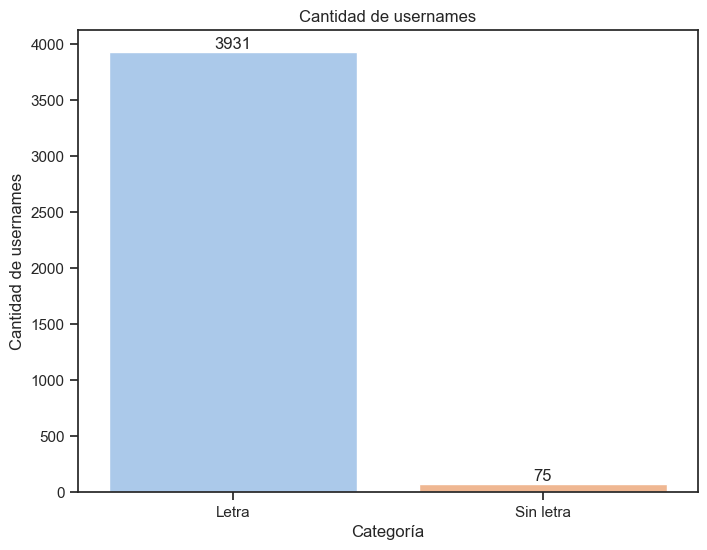

In [35]:
graficar_histograma(df_tiktok)

Verificamos que la cantidad sea correcta

In [36]:
usl = df_tiktok[~df_tiktok['Username'].str[0].str.isalpha()]['Username']
print("Usernames que no comienzan con una letra del alfabeto:")
print(usl.tolist())
num_usl = len(usl)
print("Número de elementos en usernames_sin_letra:", num_usl)

Usernames que no comienzan con una letra del alfabeto:
['_andrewcurtiss', '_lilg4', '_angelomarasigan', '2ndshuichiro', '1_alkaisr_1', '_nch04', '_desyortega_', '1spdr', '_raichouuofficial', '...anddy_', '_catben_', '1h__aa', '___nicoichi___', '_.anime.edits_0', '_.respect.boss._', '_.the.meme.hub._', '_andrewcurtiss', '_emil_official', '_ikyikyyy', '_jennifernierva', '_mister_z', '_nch04', '_space.draws_', '_subtitulos_', '_surya_editz_', '_xochitl.gomez', '_xsyalisx_', '.jmwalton', '1642l4', '1asos', '230.s', '42psy42', '4q2y', '7uss.n', '-ʟᴇɴᴀ-', '🖤🖤🖤', '💕Hayley💕', '#jelena', '🎀КАРНАВАЛ🎀', '🔥Đạt Villa🔥', '🔱 الكساحه 🔱', '🦄💙MINAMI💙🦄', '🇲🇦(محمود&مريم)🇪🇬 هيستيريا', '⚡️TEF', '🕸 VENOM 🕸', '(G)I-DLE·(여자)아이들', '_mrs.grey', '🐇Vidhi_R🐇', '✨Ren PC✨', '✨ Casal Tóxico ✨', '【コムドット】やまと', '۩♥۩ عائلة ابو زيزو ۩♥۩', '🔱🌹القيصر🌹🔱', '🌸桜🌸', '⚖️ The TikTok Attorney ⚖️', '⚖️ The TikTok Attorney ⚖️', '✨gabs Masr✨', '_.the.meme.hub._', '_xochitl.gomez', '_lilg4', '_andrewcurtiss', '000072mr', '5ifvi', '7odzz

##### v)
¿Cual es la cuenta de TikTok con mas caracteres en su nombre?

In [37]:
mas_chars = df_tiktok.loc[df_tiktok['Username'].str.len().idxmax(), 'Username']
print("Username más largo:", mas_chars)
print("Longitud:", len(mas_chars))

Username más largo: Prite Netijen Netirattanapaiboon
Longitud: 32


##### vi)
¿Cuantas cuentas de TikTok tienen el nombre de alguno de estos animales: perro, gato, leon, tigre?

In [38]:
animales = ["perro", "gato", "leon", "tigre"]
cuentas = df_tiktok[df_tiktok['Username'].str.contains('|'.join(animales), case=False)]
print("La cantidad es", len(cuentas))
print("Y las cuentas son:", cuentas)

La cantidad es 7
Y las cuentas son:                   Username                Name  Subscribers o Followers   
926   deiveleonardooficial      Deive Leonardo                      6.3  \
1238  deiveleonardooficial      Deive Leonardo                      5.8   
1460          joesantagato       Joe Santagato                      1.5   
1542          leonardzbant       Leonard Zbant                      3.0   
1762         piperrockelle  ♥️Piper Rockelle♠️                      9.5   
3399  deiveleonardooficial      Deive Leonardo                      6.1   
3648         piperrockelle  ♥️Piper Rockelle♠️                     10.4   

      Views  Likes  Comments  Shares      Month  
926   534.7   77.6     976.0     9.8   December  
1238    1.8  194.8       1.9    39.7       June  
1460    1.5  175.5       2.4     2.5       June  
1542    1.7  131.2     486.0     9.6       June  
1762    1.7  173.2       4.3   389.0       June  
3399    1.3  139.3     370.0    14.2  September  
3648    1.9  

##### vii)
Defina una metrica que identifique las 10 cuentas mas importantes de TikTok

Aqui calculamos por cuenta propia el engagement, sumando likes, comments, shares y dividiendolo entre los followers

In [39]:
df_tiktokm = (
    df_tiktok
    .assign(
        Engagement = (df_tiktok['Likes']+df_tiktok['Comments']+df_tiktok['Shares'])/df_tiktok['Subscribers o Followers']
    )
    .sort_values(by=['Engagement'],ascending=False)
)
df_tiktokm.head(10)

,Username,Name,Subscribers o Followers,Views,Likes,Comments,Shares,Month,Engagement
2325,Cierra Ramirez,cierraramirezofficial,1.3,2.4,520.8,998.0,921.0,November,1876.769231
3527,twinsjne,Twinsjne 🍓,1.1,2.4,486.9,783.0,665.0,September,1759.000000
2338,Helen Christie,helen_christie,1.2,3.0,514.9,792.0,665.0,November,1643.250000
1226,daotthungan,Đào TThu Ngân,1.0,3.1,229.7,985.0,301.0,June,1515.700000
3987,aidanmrz,Aidan Mirza,1.1,2.5,157.8,991.0,512.0,September,1509.818182
2283,Chammy 🦁,porojin,1.4,3.3,648.6,883.0,510.0,November,1458.285714
1306,estanahi,Anahí,1.3,2.9,419.5,833.0,571.0,June,1402.692308
3647,rachsullivan__,Rach Sullivan,1.5,2.0,370.2,739.0,927.0,September,1357.466667
495,unlabeled_,Paula 🐄,1.4,2.4,399.9,923.0,577.0,December,1357.071429
2609,Isma B4C,ismab4c,1.1,2.3,343.8,801.0,342.0,November,1351.636364


##### viii)
Grafique una serie de tiempo de las cuentas que tengan al menos 3 datos de meses distintos de los promedios obtenidos en el inciso ii.

***
### Youtube

#### 3.

In [40]:
y_d = pd.read_csv('socialnetworks\Youtube_dec.csv')
y_d = (
    y_d
    .assign(
        Month = 'December'
    )
    .rename(columns={
        "Youtube channel":"Username",
        "youtuber name":"Name",
        "Category":"Category1",
        "Category-2":"Category2",
        "Followers":"Subscribers o Followers",
        "\nViews (Avg.)":"Views",
        "Likes (Avg.)":"Likes",
        "Comments (Avg.)":"Comments"
    })
    .drop(columns=['s.no'])
)
y_d

,Username,Name,Category1,Subscribers o Followers,Country,Views,Likes,Comments,Category2,Month
0,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,December
1,setindia,SET India,NaN,147.2M,India,0,0,0,NaN,December
2,checkgate,Cocomelon - Nursery Rhymes,Education,146.6M,NaN,9.5M,48.3K,0,NaN,December
3,MrBeast,MrBeast,Video games,117M,United States,68.5M,2.9M,99.9K,Humor,December
4,PewDiePie,PewDiePie,Animation,111.6M,United States,1.4M,110.7K,7.8K,NaN,December
...,...,...,...,...,...,...,...,...,...,...
998,ClassicMrBean,Classic Mr Bean,NaN,10.1M,India,48.3K,624,23,NaN,December
999,Anupam Movie Songs,Anupam Movie Songs,Music & Dance,10.1M,Bangladesh,41.2K,315,18,NaN,December
1000,AnandAudio,Anand Audio,NaN,10.3M,India,175.5K,2.2K,109,NaN,December
1001,Wylsacom,Wylsacom,Science & Technology,10.3M,Russia,291.7K,13K,950,News & Politics,December


In [41]:
y_j = pd.read_csv('socialnetworks\Youtube_june.csv')
y_j = (
    y_j
    .assign(
        Month = 'June'
    )
    .rename(columns={
        "channel name":"Username",
        "youTuber":"Name",
        "Category":"Category1",
        "Category_2":"Category2",
        "Subscribers count":"Subscribers o Followers",
        "Views avg.":"Views",
        "Likes avg":"Likes",
        "Comments avg.":"Comments"
    })
)
y_j

,Username,Name,Category1,Category2,Subscribers o Followers,Country,Views,Likes,Comments,Month
0,juptube,Galinha Pintadinha,Music & Dance,NaN,30.5M,-,0,N/A',N/A',June
1,"Baby Big Mouth Kids - Sing, Dance, Explore","Baby Big Mouth Kids - Sing, Dance, Explore",Animation,Toys,10.6M,-,348.5,3,N/A',June
2,shfa show India,shfa show India,Daily vlogs,NaN,18.9M,-,1.2M,8.7K,N/A',June
3,Blippi - Educational Videos for Kids,Blippi - Educational Videos for Kids,Education,Toys,15.7M,-,1.2M,4.2K,N/A',June
4,infobellstamil,infobells - Tamil,Education,NaN,26.5M,-,1.3M,5.8K,N/A',June
...,...,...,...,...,...,...,...,...,...,...
1016,Power Vision,Power Vision,NaN,NaN,9.5M,United States,137.3K,1.3K,39,June
1017,POPSVIETNAM,POPS MUSIC,Music & Dance,NaN,9.5M,United States,4.6K,144,5,June
1018,Niki and Gabi,Niki and Gabi,Fashion,Humor,9.5M,United States,387.6K,17.8K,516,June
1019,Corridor,Corridor,Animation,NaN,9.5M,United States,1.9M,141.6K,4.7K,June


In [42]:
y_n = pd.read_csv('socialnetworks\Youtube_nov.csv')
y_n = (
    y_n
    .assign(
        Month = 'November'
    )
    .rename(columns={
        "Youtube channel":"Username",
        "youtuber name":"Name",
        "Category":"Category1",
        "Category-2":"Category2",
        "Followers":"Subscribers o Followers",
        "\nViews (Avg.)":"Views",
        "Likes (Avg.)":"Likes",
        "Comments (Avg.)":"Comments"
    })
    .drop(columns=['s.no'])
)
y_n

,Username,Name,Category1,Subscribers o Followers,Country,Views,Likes,Comments,Category2,Month
0,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,November
1,checkgate,Cocomelon - Nursery Rhymes,Education,146.6M,NaN,9.5M,48.3K,0,NaN,November
2,PewDiePie,PewDiePie,Animation,111.6M,United States,1.4M,110.7K,7.8K,NaN,November
3,MrBeast6000,MrBeast,Video games,109.1M,United States,38.4M,3.1M,56.7K,Humor,November
4,✿ Kids Diana Show,✿ Kids Diana Show,Animation,102.5M,NaN,2.4M,15.7K,0,Toys,November
...,...,...,...,...,...,...,...,...,...,...
995,RUOK,RUOK,NaN,10.1M,Brazil,215.4K,25.2K,1.3K,NaN,November
996,FoxNewsChannel,Fox News,News & Politics,10.1M,United States,98.4K,4K,884,NaN,November
997,SULE PRODUCTIONS,SULE PRODUCTIONS,NaN,10.1M,Indonesia,218.3K,4.5K,306,NaN,November
998,MBCkpop,MBCkpop,Music & Dance,10.1M,Malaysia,19.7K,2.6K,92,NaN,November


In [43]:
y_s = pd.read_csv('socialnetworks/Youtube_sep.csv')

y_s = (
    y_s
    .assign(
        Month='September'
    )
    .rename(columns={
        "Name": "Name",
        "Youtuber": "Username",
        "Category_2": "Category1",
        "Category_3": "Category2",
        "Avg. views\r\n": "Views",
        "Avg. likes": "Likes",
        "Avg Comments": "Comments",
        " Subscribers": "Subscribers o Followers"
    })
    .drop(columns=['S.no'])
)
y_s

,Name,Username,Country,Subscribers o Followers,Category1,Views,Likes,Comments,Category2,Month
0,T-Series,tseries,India,224.4M,Music & Dance,141.5K,4.6K,125,NaN,September
1,Cocomelon - Nursery Rhymes,checkgate,NaN,142.5M,Education,12.5M,64.8K,0,NaN,September
2,PewDiePie,PewDiePie,United States,111.6M,Animation,1.9M,130.5K,7.4K,NaN,September
3,MrBeast,MrBeast6000,United States,104.1M,Video games,44.8M,2.2M,70.9K,Humor,September
4,✿ Kids Diana Show,✿ Kids Diana Show,NaN,100.5M,Animation,6.9M,34.8K,0,Toys,September
...,...,...,...,...,...,...,...,...,...,...
1042,Raditya Dika,Raditya Dika,Indonesia,9.9M,Food & Drinks,430.5K,14.8K,741,NaN,September
1043,Ini Talk Show,IniTalkShow,Indonesia,9.9M,Music & Dance,25.2K,290,17,Humor,September
1044,SpriteDer SPD,SpriteDer SPD,Thailand,9.9M,Humor,4.4M,154.4K,3.6K,NaN,September
1045,Classic Mr Bean,Classic Mr Bean,India,9.9M,NaN,132.6K,1.1K,53,NaN,September


In [44]:
df_youtube = pd.concat([y_d,y_j,y_n,y_s],ignore_index=True)
df_youtube

,Username,Name,Category1,Subscribers o Followers,Country,Views,Likes,Comments,Category2,Month
0,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,December
1,setindia,SET India,NaN,147.2M,India,0,0,0,NaN,December
2,checkgate,Cocomelon - Nursery Rhymes,Education,146.6M,NaN,9.5M,48.3K,0,NaN,December
3,MrBeast,MrBeast,Video games,117M,United States,68.5M,2.9M,99.9K,Humor,December
4,PewDiePie,PewDiePie,Animation,111.6M,United States,1.4M,110.7K,7.8K,NaN,December
...,...,...,...,...,...,...,...,...,...,...
4066,Raditya Dika,Raditya Dika,Food & Drinks,9.9M,Indonesia,430.5K,14.8K,741,NaN,September
4067,IniTalkShow,Ini Talk Show,Music & Dance,9.9M,Indonesia,25.2K,290,17,Humor,September
4068,SpriteDer SPD,SpriteDer SPD,Humor,9.9M,Thailand,4.4M,154.4K,3.6K,NaN,September
4069,Classic Mr Bean,Classic Mr Bean,NaN,9.9M,India,132.6K,1.1K,53,NaN,September


#### 4.

In [45]:
youtube_res = pd.read_csv('socialnetworks\Youtube.csv')
youtube_res = (
    youtube_res
    .rename(columns={
        "youtuber name" : "Username",
        "channel name":"Name",
        "Subscribers":"Subscribers o Followers",
        "Audience Country":"Country",
        "avg views":"Views",
        "avg likes": "Likes",
        "avg comments":"Comments"
    })
)
youtube_res 

,Username,Name,Category,Subscribers o Followers,Country,Views,Likes,Comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290
1,checkgate,Cocomelon - Nursery Rhymes,Education,132.1M,NaN,13.8M,80.9K,NaN
2,setindia,SET India,NaN,130.4M,India,23.6K,314,21
3,PewDiePie,PewDiePie,Animation,111.4M,United States,1.4M,80.8K,4.6K
4,MrBeast6000,MrBeast,Video games,92.5M,United States,30.6M,1.7M,67.7K
...,...,...,...,...,...,...,...,...
995,FutParódias,FutParódias,Music & Dance,9.2M,Brazil,1.4M,110.1K,2.5K
996,EL GATO,EL GATO,Toys,9.2M,Brazil,243.8K,30.7K,636
997,CinemaSins,CinemaSins,Movies,9.2M,United States,296K,10.2K,874
998,CricketICC,ICC,Sports,9.2M,India,15.2K,854,58


#### 5.

##### i)
Numero total de cuentas distintas

In [46]:
duplicadosnt = df_youtube.drop_duplicates(subset=['Username'], keep='first')
tam = duplicadosnt.copy()
tam.shape

(1327, 10)

Podemos observar que tam contiene 1327 filas, lo que significa que hay 1327 cuentas únicas y 2744 repeticiones.

In [47]:
tam

,Username,Name,Category1,Subscribers o Followers,Country,Views,Likes,Comments,Category2,Month
0,tseries,T-Series,Music & Dance,229.5M,India,103.8K,2.8K,158,NaN,December
1,setindia,SET India,NaN,147.2M,India,0,0,0,NaN,December
2,checkgate,Cocomelon - Nursery Rhymes,Education,146.6M,NaN,9.5M,48.3K,0,NaN,December
3,MrBeast,MrBeast,Video games,117M,United States,68.5M,2.9M,99.9K,Humor,December
4,PewDiePie,PewDiePie,Animation,111.6M,United States,1.4M,110.7K,7.8K,NaN,December
...,...,...,...,...,...,...,...,...,...,...
3983,Beast Philanthropy,Beast Philanthropy,Food & Drinks,10.1M,United States,7.9M,504.7K,23.6K,NaN,September
3991,VitalyzdTv,VitalyzdTv,Humor,10M,United States,112.3K,3.7K,574,NaN,September
3994,UTKARSH CLASSES JODHPUR,UTKARSH CLASSES JODHPUR,Education,10M,India,150.8K,11K,430,NaN,September
4020,IniTalkShow,Ini Talk Show,Music & Dance,9.9M,Indonesia,25.2K,290,17,Humor,September


##### ii)
Calcular el promedio de seguidores, authentic, engagement, de cada cuenta.

In [48]:
columnast = ['Subscribers o Followers', 'Views', 'Likes', 'Comments']

for columna in columnast:
    df_youtube[columna] = df_youtube[columna].apply(lambda x: str(x)
                                                   .replace('M', '')
                                                   .replace('K', '')
                                                   if pd.notnull(x) else x)
    df_youtube[columna] = pd.to_numeric(df_youtube[columna], errors='coerce')

promedio = []

for username in df_youtube["Username"].unique():
    filas = df_youtube[df_youtube["Username"] == username]
    reps = len(filas)
    followers = np.divide(np.sum(filas["Subscribers o Followers"]), reps)
    views = np.divide(np.sum(filas["Views"]), reps)
    likes = np.divide(np.sum(filas["Likes"]), reps)
    comments = np.divide(np.sum(filas["Comments"]), reps)
    pais = filas["Country"].values[0]
    promedio.append({
        'Username': username,
        'Promedio de subs': followers,
        'Promedio views': views,
        'Promedio likes': likes,
        'Promedio comments': comments,
        "Pais" : pais
    })

promedios = pd.DataFrame(promedio)
promedios


,Username,Promedio de subs,Promedio views,Promedio likes,Promedio comments,Pais
0,tseries,225.100,122.35,3.650,161.000,India
1,setindia,138.850,13.10,179.000,11.000,India
2,checkgate,143.075,10.60,57.550,0.000,NaN
3,MrBeast,117.000,68.50,2.900,99.900,United States
4,PewDiePie,111.575,2.30,175.575,10.075,United States
...,...,...,...,...,...,...
1322,Beast Philanthropy,10.100,7.90,504.700,23.600,United States
1323,VitalyzdTv,10.000,112.30,3.700,574.000,United States
1324,UTKARSH CLASSES JODHPUR,10.000,150.80,11.000,430.000,India
1325,IniTalkShow,9.900,25.20,290.000,17.000,Indonesia


##### iii)
Metricas de Valor de cada cuenta. Para este punto debe utilizar los promedios del punto anterior: Promedio Engagement/Promedio Followers.

In [49]:
promedios["Metrica v/f"]= promedios['Promedio views']/promedios['Promedio de subs']
promedios["Metrica l/f"] = promedios['Promedio likes']/promedios['Promedio de subs']
promedios["Metrica c/f"] = promedios['Promedio comments']/promedios['Promedio de subs']
promedios

,Username,Promedio de subs,Promedio views,Promedio likes,Promedio comments,Pais,Metrica v/f,Metrica l/f,Metrica c/f
0,tseries,225.100,122.35,3.650,161.000,India,0.543536,0.016215,0.715238
1,setindia,138.850,13.10,179.000,11.000,India,0.094346,1.289161,0.079222
2,checkgate,143.075,10.60,57.550,0.000,NaN,0.074087,0.402237,0.000000
3,MrBeast,117.000,68.50,2.900,99.900,United States,0.585470,0.024786,0.853846
4,PewDiePie,111.575,2.30,175.575,10.075,United States,0.020614,1.573605,0.090298
...,...,...,...,...,...,...,...,...,...
1322,Beast Philanthropy,10.100,7.90,504.700,23.600,United States,0.782178,49.970297,2.336634
1323,VitalyzdTv,10.000,112.30,3.700,574.000,United States,11.230000,0.370000,57.400000
1324,UTKARSH CLASSES JODHPUR,10.000,150.80,11.000,430.000,India,15.080000,1.100000,43.000000
1325,IniTalkShow,9.900,25.20,290.000,17.000,Indonesia,2.545455,29.292929,1.717172


##### iv)
Graficar en un histograma el numero de cuentas que inicien por cada letra del alfabeto

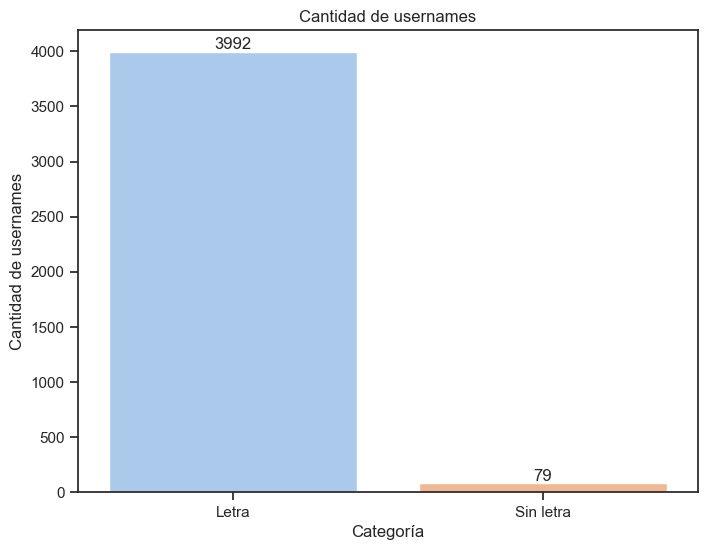

In [50]:
graficar_histograma(df_youtube)

Verificamos que la cantidad sea correcta

In [51]:
usl = df_youtube[~df_youtube['Username'].str[0].str.isalpha()]['Username']
print("Usernames que no comienzan con una letra del alfabeto:")
print(usl.tolist())
num_usl = len(usl)
print("Número de elementos en usernames_sin_letra:", num_usl)

Usernames que no comienzan con una letra del alfabeto:
['✿ Kids Diana Show', '5-Minute Crafts', '1MILLION Dance Studio', '★ Kids Roma Show', '5-Minute Crafts DIY', '5-Minute Crafts PLAY', '7clouds', '5-Minute Crafts FAMILY', '#Refugio Mental', '5-Minute Crafts Recycle', '123 GO! Spanish', '#Refúgio Mental', '1032010814', '123 GO!', '5-Minute Crafts LIKE', '[햄지]Hamzy', '5-Minute Recipes', '0214mex', '123 GO! Hindi', '✿ Kids Diana Show', '★ Kids Roma Show', '#Refugio Mental', '#Refúgio Mental', '5incominutos', '5-Minute Crafts', '1MILLION Dance Studio', '5-Minute Crafts DIY', '5-Minute Crafts PLAY', '5-Minute Crafts Recycle', '5-Minute Recipes', '123 GO! Hindi', '5-Minute Crafts TEENS', '0214mex', '123 GO! Spanish', '5-Minute Crafts FAMILY', '1032010814', '1veritasium', '123 GO!', '5-Minute Crafts LIKE', '[햄지]Hamzy', '✿ Kids Diana Show', '5-Minute Crafts', '1MILLION Dance Studio', '5-Minute Crafts DIY', '★ Kids Roma Show', '5-Minute Crafts PLAY', '5-Minute Crafts FAMILY', '#Refugio Menta

##### v)
Cuantas cuentas de YouTube tienen ya sea en su username o name las letras de las iniciales del primer nombre de cada uno de los integrantes de tu equipo?

In [52]:
iniciales = df_youtube[(df_youtube['Username'].str.lower().str.startswith(('a', 'd', 'j'))) | (df_youtube['Name'].str.lower().str.startswith(('a', 'd','j'))) ].drop_duplicates(subset=['Username', 'Name']).dropna(subset=['Username','Name'])
iniciales

,Username,Name,Category1,Subscribers o Followers,Country,Views,Likes,Comments,Category2,Month
21,dudeperfect,Dude Perfect,Video games,58.6,United States,7.1,207.6,6.7,NaN,December
28,aajtak,Aaj Tak,News & Politics,54.9,India,3.2,45.0,5.0,NaN,December
37,JuegaGerman,JuegaGerman,Movies,46.6,Mexico,874.0,85.9,3.0,Animation,December
45,DjWalkzz,Alan Walker,Music & Dance,42.7,United States,104.5,9.9,477.0,Movies,December
46,A4,A4,Animation,42.5,Russia,11.2,404.5,27.1,Humor,December
...,...,...,...,...,...,...,...,...,...,...
2956,Juice WRLD,Juice WRLD,Music & Dance,10.5,United States,2.1,142.4,10.2,NaN,November
2988,Dental Digest,Dental Digest,NaN,10.3,United States,412.5,14.8,681.0,NaN,November
3139,Jingle Toons,Jingle Toons,NaN,29.1,India,82.5,830.0,10.0,NaN,September
3382,kidstvsongs,Doggy Doggy Cartoons,NaN,16.8,NaN,3.1,50.0,0.0,NaN,September


##### vi)
Defina una metrica que identifique las 10 cuentas mas importantes de YouTube

Aqui calculamos por cuenta propia el engagement, sumando likes, comments, dividiendolo entre los followers, asi tenemos los canales con mejor interaccion acorde a sus subs

In [53]:
df_youtubem = (
    df_youtube
    .assign(
        Engagement = (df_youtube['Likes']+df_youtube['Comments']+df_youtube['Views'])/df_youtube['Subscribers o Followers']
    )
    .sort_values(by=['Engagement'],ascending=False)
)
df_youtubem.head(10)

,Username,Name,Category1,Subscribers o Followers,Country,Views,Likes,Comments,Category2,Month,Engagement
3817,BakLol Video,BakLol Video,Movies,11.3,India,935.2,15.0,915.0,Humor,September,165.061947
1995,bgfilms,Babish Culinary Universe,Food & Drinks,9.7,United States,577.4,26.0,968.0,NaN,June,162.000000
939,BrPVPHu3,João Caetano,NaN,10.4,Brazil,626.3,45.6,966.0,NaN,December,157.490385
2962,BrPVPHu3,João Caetano,NaN,10.4,Brazil,626.3,45.6,966.0,NaN,November,157.490385
3929,설기양SULGI,설기양SULGI,ASMR,10.5,United States,955.6,22.2,673.0,Food & Drinks,September,157.219048
1640,BERTH-OH,BERTH-OH,NaN,10.0,Mexico,790.7,30.2,709.0,NaN,June,152.990000
1416,iloveindianmakeup,Anaysa,Humor,13.1,India,998.9,36.9,950.0,NaN,June,151.587786
1269,Lorrayne Oliveira,Lorrayne Oliveira,Toys,10.1,Brazil,525.2,26.0,979.0,NaN,June,151.504950
2834,BakLol Video,BakLol Video,Movies,11.4,India,727.8,15.7,954.0,Humor,November,148.903509
1559,NessieJudge,Nessie Judge,NaN,9.4,Indonesia,476.9,28.9,878.0,NaN,June,147.212766


##### vii) y ix)
Procedemos a crear una serie con todos los países.

In [54]:
serie_paises2 = promedios.groupby('Pais')['Promedio de subs'].mean()
serie_paises2 = serie_paises2[serie_paises2.index.str.match(r'^[a-zA-Z\s]+$')]
serie_paises2

Pais
Algeria           12.205000
Argentina         16.892857
Bangladesh        13.628333
Brazil            16.061634
Colombia          18.651111
Cyprus            10.733333
Ecuador           26.400000
Egypt             13.036111
France            17.508333
India             19.861375
Indonesia         15.516818
Iraq              13.884848
Japan             12.556250
Jordan            12.600000
Malaysia           9.950000
Mexico            17.201928
Morocco           11.460417
Pakistan          15.970513
Peru              11.158333
Philippines       17.590104
Russia            14.584474
Saudi Arabia      16.223333
Somalia           10.733333
Spain             19.079167
Thailand          18.575397
Turkey            13.529167
United Kingdom    14.803125
United States     17.790653
Name: Promedio de subs, dtype: float64

Y graficamos los resultados.

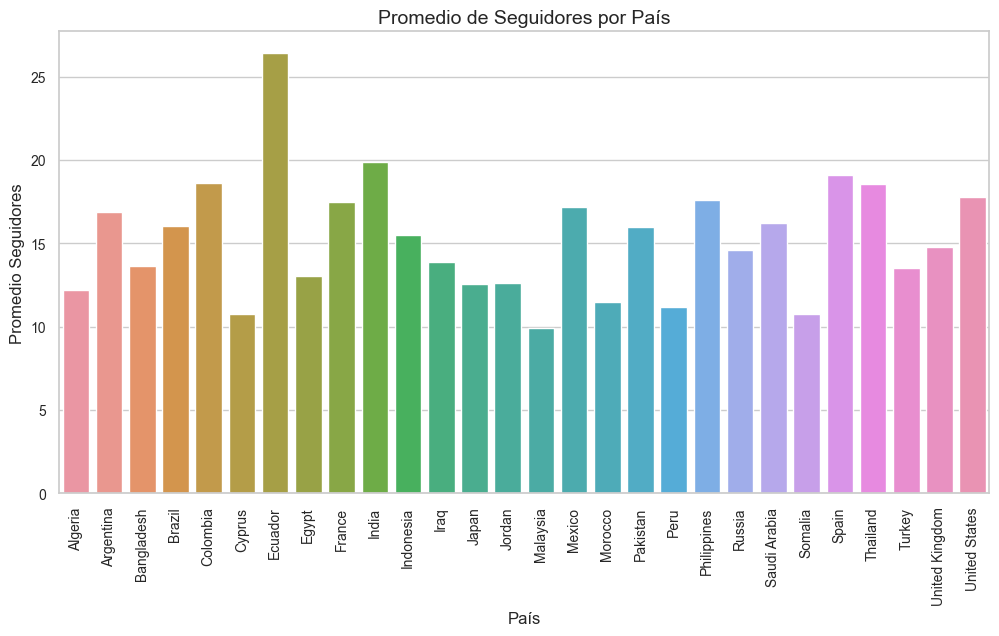

In [55]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=serie_paises2.index, y=serie_paises2.values)
plt.xlabel('País', fontsize=12)
plt.ylabel('Promedio Seguidores', fontsize=12)
plt.title('Promedio de Seguidores por País', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

##### viii)
Cree una serie con todas las categorias existentes en todos los archivos de YouTube.

In [56]:
serie_category = pd.concat([df_youtube['Category1'], df_youtube['Category2']], ignore_index=True).dropna().unique()
serie_category

array(['Music & Dance', 'Education', 'Video games', 'Animation', 'Toys',
       'Movies', 'News & Politics', 'Daily vlogs', 'Humor', 'Fitness',
       'Food & Drinks', 'Beauty', 'DIY & Life Hacks',
       'Science & Technology', 'Sports', 'Health & Self Help',
       'Animals & Pets', 'ASMR', 'Design/art', 'Fashion', 'Travel',
       'Autos & Vehicles', 'Mystery'], dtype=object)

##### x)
Grafique en un histograma el numero de seguidores por categoria.

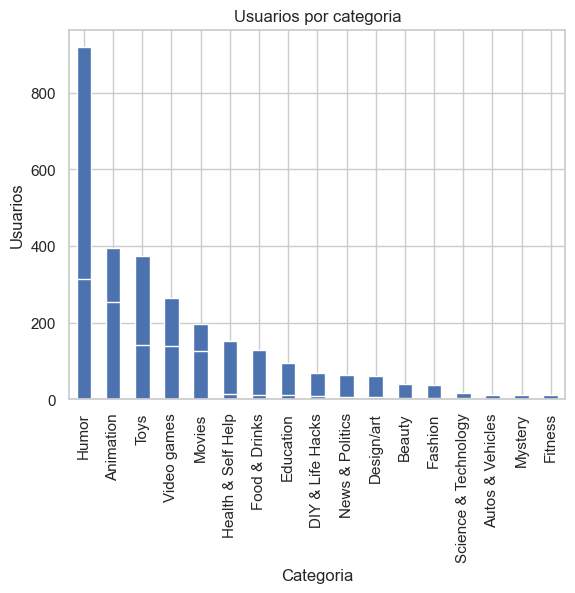

In [57]:
category1  = df_youtube['Category1'].value_counts()
category2 = df_youtube['Category2'].value_counts()
category1.plot(kind='bar')
category2.plot(kind='bar')
plt.xlabel('Categoria')
plt.ylabel('Usuarios')
plt.title('Usuarios por categoria')
plt.show()

### 6.
¿Cuales diría desde su punto de vista, y basado solamente en los archivos que analizo, que son las 5 cuentas mas importantes de las 3 redes sociales?


Desde nuestro punto de vista seria el primero en aparecer en los 3 dtaaframes de los mejores, puesto que tendria la mejor interaccion acorde a sus subs